# The Best Classifier

Prepared by Graeme Benson

Last updated: July 11, 2021

This notebook is based on the [following notebook](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/ML0101EN-Proj-Loan-py-v1.ipynb) from the IBM Developer Skills Network. This was completed for the peer-graded assignment module within the IBM Data Science Professional Certificate course, "Machine Learning with Python." 

## Boilerplate & Initial Data Load

In [1]:
# Import preliminary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Download the training and test data sets
# Training
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

# Test
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
    
# Assign train_df to the training data set
train_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

## Preliminary Data Exploration

In [3]:
# Training data
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# Test data
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


We have some unnamed columns, dates to convert, education typos to correct, and genders to impute.

## Data Cleansing

In [5]:
# Invoke custom function to clean the data
def clean_data(dataframe):
    df = dataframe
    
    # Drop unnamed columns
    df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
    
    # Clean column names
    df.columns = df.columns.str.lower()
    
    # Convert date attributes
    df['due_date'] = pd.to_datetime(df['due_date'])
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    
    # Correct education typos
    df['education'].replace(to_replace = ['college', 'Bechalor', 'Master or Above'], value = ['Some College', "Bachelor's", "Master's or Above"], inplace = True)
    
    return df

In [6]:
# Clean the training data
train_df = clean_data(train_df)
train_df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor's,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,Some College,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,Some College,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,Some College,male


In [7]:
# Clean the test data
test_df = clean_data(test_df)
test_df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor's,female
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master's or Above,male
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,Some College,male
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor's,male


Now that our data are cleaned, we can perform exploratory data anlysis on our training data. 

## Exploratory Data Analysis

*The visualizations were taken from the original template with some slight modifications.*

In [8]:
# Import Seaborn for data visualizations
import seaborn as sns

# Invoke custom function to perform EDA on our dataframes
def EDA(dataframe):
    df = dataframe
    # Histogram of principal balance
    plt.figure()
    bins_1 = np.linspace(df.principal.min(), df.principal.max(), 10)
    g_1 = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
    g_1.map(plt.hist, 'principal', bins=bins_1, ec="k")
    g_1.axes[-1].legend()
    plt.show()
    
    # Histogram of age of borrowers
    plt.figure()
    bins_2 = np.linspace(df.age.min(), df.age.max(), 10)
    g_2 = sns.FacetGrid(df, col="gender", hue="loan_status", palette="Set1", col_wrap=2)
    g_2.map(plt.hist, 'age', bins=bins_2, ec="k")
    g_2.axes[-1].legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

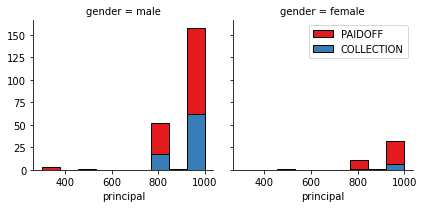

<Figure size 432x288 with 0 Axes>

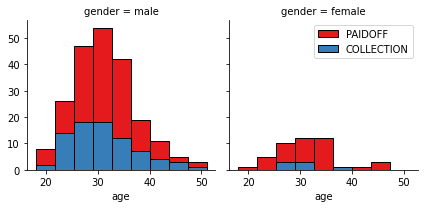

In [9]:
# Exploring the training data
EDA(train_df)

Key findings from the EDA on the training dataset:
1. The principal loan balance appears highly concentrated between 800 - 1000 units. This may be useful in determining a principal balance feature.
2. Males appear more likely to borrow than females. Gender may or may not be a useful feature.
3. Most borrowers appears to be in their late 20's - early 30's. This may be useful in determining an age feature.

## Data Pre-processing: Feature Selection/Extraction

In [10]:
# Invoke custom function to impute features in our dataframes
def create_features(dataframe):
    df = dataframe
    
    # Assign target attribute based on loan_status
    df['target'] = df['loan_status'].apply(lambda x: 1 if (x == 'PAIDOFF') else 0)
    
    # Determine the day of the week the loan was taken out
    df['day_of_week'] = df['effective_date'].dt.dayofweek
    
    # Impute whether the loan was taken out closer to the end of the week
    df['week_part'] = df['day_of_week'].apply(lambda x: 1 if (x > 3)  else 0)
    
    # Replace gender with binary indicator (0 = male, 1 = female)
    df['gender'] = df['gender'].apply(lambda x: 1 if (x == 'female') else 0)
    
    # Select relevant columns
    cols = ['target', 'principal', 'terms', 'age', 'gender', 'week_part']
    dummies = ['education']
    
    # Assign new feature dataframe
    feature_df = pd.concat([df[cols], pd.get_dummies(df[dummies])], axis = 1)
    
    return feature_df 

In [11]:
train_df_feat = create_features(train_df)
train_df_feat.head()

,target,principal,terms,age,gender,week_part,education_Bachelor's,education_High School or Below,education_Master's or Above,education_Some College
0,1,1000,30,45,0,0,0,1,0,0
1,1,1000,30,33,1,0,1,0,0,0
2,1,1000,15,27,0,0,0,0,0,1
3,1,1000,30,28,1,1,0,0,0,1
4,1,1000,30,29,0,1,0,0,0,1


In [12]:
# Assign the features variable based on our feature columns
features = train_df_feat.columns
features = features.drop(['target'])

# Assign X variable
X = train_df_feat[features]

# Assign y variable
y = train_df_feat['target']

## Data Pre-processing: Split & Pre-process Data

In [13]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Set random state for reproducibility
rs = 1

# Split the training data into test and validate subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = rs)

In [14]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit our scaler to the training data
scaler.fit(X_train)

# Transform our training and validation data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

## Model 1: K Nearest Neighbors

In [15]:
# Import package to build K Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier

# Create empty dataframe to store accuracy scores
knn_acc = pd.DataFrame(data = None, columns = ['k', 'score', 'model'])

# Loop through different k to determine best number of clusters to use
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score = knn.score(X_val, y_val)
    knn_acc.loc[k, 'k'] = k
    knn_acc.loc[k, 'score'] = score
    knn_acc.loc[k, 'model'] = knn

# Assign most accurate k to k_final variable by selecting the minimum k with the maximum score
k_final = min(knn_acc[knn_acc['score'] == knn_acc['score'].max()].k)

# Assign knn_score variable
knn_score = knn_acc.loc[k_final, 'score']

# Select the best model for use with the test data
best_knn = knn_acc.loc[k_final, 'model']

print("The optimal k when the random state is set to ", rs, " is ", k_final, " with a score of ", knn_score, ".")

The optimal k when the random state is set to  1  is  12  with a score of  0.782608695652174 .


## Model 2: Decision Tree

In [16]:
# Import package to build Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create empty dataframe to store accuracy scores
tree_acc = pd.DataFrame(data = None, columns = ['depth', 'score', 'model'])

# Loop through different tree depths to determine best depth for the tree
for td in range(1, 11):
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = td)
    dtc.fit(X_train, y_train)
    score = dtc.score(X_val, y_val)
    tree_acc.loc[td, 'depth'] = td
    tree_acc.loc[td, 'score'] = score
    tree_acc.loc[td, 'model'] = dtc
    
# Assign most accurate tree depth to depth_final variable by selecting the minimum tree depth with the maximum score
depth_final = min(tree_acc[tree_acc['score'] == tree_acc['score'].max()].depth)

# Assign final_score variable
tree_score = tree_acc.loc[depth_final, 'score']

# Select the best model for use with the test data
best_tree = tree_acc.loc[depth_final, 'model']

print("The optimal tree depth when the random state is set to ", rs, " is ", depth_final, " with a score of ", tree_score, ".")

The optimal tree depth when the random state is set to  1  is  6  with a score of  0.7739130434782608 .


## Model 3: Support Vector Machine

In [17]:
# Import package to build SVM model
from sklearn.svm import SVC

# Create empty dataframe to store accuracy scores
svm_acc = pd.DataFrame(data = None, columns = ['kernel', 'score', 'model'])

# Assign list of kernels to iterate through
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in range(len(kernels)):
    kernel = kernels[k]
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    score = svm.score(X_val, y_val)
    svm_acc.loc[k, 'kernel'] = kernel
    svm_acc.loc[k, 'score'] = score
    svm_acc.loc[k, 'model'] = svm
    
# Assign most accurate kernel to kernel_final variable by selecting the kernel with the maximum score
kernel_final = svm_acc[svm_acc['score'] == svm_acc['score'].max()].kernel.values[0]

# Assign final_score variable
svm_score = svm_acc[svm_acc['kernel'] == kernel_final].score.values[0]

# Select the best model for use with the test data
best_svm = svm_acc.loc[svm_acc['kernel'] == kernel_final].model.values[0]

print("The optimal kernel when the random state is set to ", rs, " is ", kernel_final, " with a score of ", svm_score, ".")

The optimal kernel when the random state is set to  1  is  linear  with a score of  0.7652173913043478 .


## Model 4: Logistic Regression

In [18]:
# Import package to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_val, y_val)

print("The logistic regression model has a score of ", score, ".")

The logistic regression model has a score of  0.7652173913043478 .


## Model Evaluation Using Test Data Set

In [19]:
# Create features from test data
test_df_feat = create_features(test_df)
test_df_feat.head()

,target,principal,terms,age,gender,week_part,education_Bachelor's,education_High School or Below,education_Master's or Above,education_Some College
0,1,1000,30,50,1,0,1,0,0,0
1,1,300,7,35,0,1,0,0,1,0
2,1,1000,30,43,1,1,0,1,0,0
3,1,1000,30,26,0,1,0,0,0,1
4,1,800,15,29,0,1,1,0,0,0


In [20]:
# Assign X variable
X_test = test_df_feat[features]

# Assign y_test variable
y_test = test_df_feat['target']

In [21]:
# Scale our test data
X_test = scaler.transform(X_test)

In [22]:
# Generate predictions from K Nearest Neighbors model
knn_yhat = best_knn.predict(X_test)

# Generate predictions from Decision Tree model
tree_yhat = best_tree.predict(X_test)

# Generate predictions from Support Vector Machines model
svm_yhat = best_svm.predict(X_test)

# Generate predictions from Logistic Regression model
logreg_yhat = logreg.predict(X_test)

In [23]:
# Import necessary metrics to evaluate each model
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [24]:
# Create evaluation dataframe to store results from applying each model to the test data
evaluation = pd.DataFrame(data = None, columns = ['Algorithm', 'Jaccard', 'F1 Score', 'LogLoss'])

In [25]:
# Evaluate predictions from K Nearest Neighbors model
evaluation.loc[0, 'Algorithm'] = 'KNN'
evaluation.loc[0, 'Jaccard'] = jaccard_score(y_test, knn_yhat)
evaluation.loc[0, 'F1 Score'] = f1_score(y_test, knn_yhat)
evaluation.loc[0, 'LogLoss'] = 'NA'

# Evaluate predictions from Decision Tree model
evaluation.loc[1, 'Algorithm'] = 'Decision Tree'
evaluation.loc[1, 'Jaccard'] = jaccard_score(y_test, tree_yhat)
evaluation.loc[1, 'F1 Score'] = f1_score(y_test, tree_yhat)
evaluation.loc[1, 'LogLoss'] = 'NA'

# Evaluate predictions from Support Vector Machine model
evaluation.loc[2, 'Algorithm'] = 'SVM'
evaluation.loc[2, 'Jaccard'] = jaccard_score(y_test, svm_yhat)
evaluation.loc[2, 'F1 Score'] = f1_score(y_test, svm_yhat)
evaluation.loc[2, 'LogLoss'] = 'NA'

# Evaluate predictions from Logistic Regression model
evaluation.loc[3, 'Algorithm'] = 'Logistic Regression'
evaluation.loc[3, 'Jaccard'] = jaccard_score(y_test, logreg_yhat)
evaluation.loc[3, 'F1 Score'] = f1_score(y_test, logreg_yhat)
evaluation.loc[3, 'LogLoss'] = log_loss(y_test, logreg_yhat)

# Display evaluation results
evaluation

,Algorithm,Jaccard,F1 Score,LogLoss
0,KNN,0.612245,0.759494,NA
1,Decision Tree,0.745098,0.853933,NA
2,SVM,0.740741,0.851064,NA
3,Logistic Regression,0.740741,0.851064,8.9547
